# EXAM EDA

## Rumusan

Angka harapan hidup atau life expectancy suatu negara dapat ditentukan oleh berbagai macam hal salah satunya adalah penyakit, tingkat kematian dan kesehatan. 

Rumusan masalah:
- permasalahan apa saja yang memicu rendahnya angka harapan hidup suatu negara?
- apakah kesehatan mempengaruhi status negara?
- apakah pertumbuhan tiap tahun angka harapan hidup semakin meningkat?

Analisis (EDA) bertujuan untuk:
- Mengetahui faktor mempengaruhi angka harapan hidup dunia
- mengetahui dasar kategori maju atau berkembangnya suatu negara
- mengetahui perkembangan angka harapan hidup dunia pertahun

Sumber :
https://www.who.int/gho/mortality_burden_disease/life_tables/situation_trends_text/en/

# Data Preprocessing

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Data

In [3]:
#memasukkan data dari csv
df = pd.read_csv('WHO.csv')
df.head() #menampilkan data 5 teratas

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Data Identification

In [4]:
df.shape

(2938, 22)

##### Data memiliki baris 2938 dan kolom 22

In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

##### Data terdiri atas kolom diatas

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

##### Jenis data pada kolom

### Check Missing Value

In [7]:
df.isna().values.any()

True

##### Terdapat missing value pada dataset

In [8]:
df.isna().sum()/len(df)*100 

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

##### Persen data yang terdapat missing value

### Handling Data and Missing Value

In [9]:
df = df.dropna(subset=['Life expectancy '])
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


##### menghilangkan data kosong pada kolom life expectancy karena merupakan target kolom

In [10]:
df = df.drop(columns=['Total expenditure','Adult Mortality','under-five deaths ','GDP'])
df.head()

,Country,Year,Status,Life expectancy,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,62,0.01,71.279624,65.0,1154,19.1,6.0,65.0,0.1,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,64,0.01,73.523582,62.0,492,18.6,58.0,62.0,0.1,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,66,0.01,73.219243,64.0,430,18.1,62.0,64.0,0.1,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,69,0.01,78.184215,67.0,2787,17.6,67.0,67.0,0.1,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,71,0.01,7.097109,68.0,3013,17.2,68.0,68.0,0.1,2978599.0,18.2,18.2,0.454,9.5


##### Beberapa kolom di drop karena sudah direpresentasikan kolom lain
- total expenditure = percentage expenditure
- adult mortality = life expectancy
- under five death
- income composition = GDP

In [11]:
df.isna().sum()/len(df)*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.000000
infant deaths                       0.000000
Alcohol                             6.591530
percentage expenditure              0.000000
Hepatitis B                        18.886612
Measles                             0.000000
 BMI                                1.092896
Polio                               0.648907
Diphtheria                          0.648907
 HIV/AIDS                           0.000000
Population                         21.994536
 thinness  1-19 years               1.092896
 thinness 5-9 years                 1.092896
Income composition of resources     5.464481
Schooling                           5.464481
dtype: float64

##### mengecek lagi persentase data kosong setelah kolom target yang tidak memiliki nilai di drop

In [12]:
df['Alcohol'] = df.groupby('Country')['Alcohol'].apply(lambda x: x.fillna(x.mean()))
df['Alcohol'] = df['Alcohol'].fillna(0) #tinggal south sudan di representasikan 0 karena hukum sariah
df['Alcohol'].isnull().values.any() #cek apa ada data kosong

False

##### mengisi kolom kosong alkohol dengan rerata konsumsi pertahun tiap negara dan south sudah karena hukum syariah
sumber : https://www.voanews.com/archive/alcohol-growing-problem-south-sudan

In [13]:
df['Hepatitis B'] = df.groupby('Country')['Hepatitis B'].apply(lambda x: x.fillna(x.mean()))
df['Hepatitis B'] = df.groupby('Status')['Hepatitis B'].apply(lambda x: x.fillna(x.mean()))
df['Hepatitis B'].isnull().values.any()

False

In [14]:
df[' BMI '] = df.groupby('Country')[' BMI '].apply(lambda x: x.fillna(x.mean()))
df[' BMI '] = df.groupby('Status')[' BMI '].apply(lambda x: x.fillna(x.mean()))
df[' BMI '].isnull().values.any()

False

In [15]:
df['Polio'] = df.groupby('Country')['Polio'].apply(lambda x: x.fillna(x.mean()))
df['Polio'] = df.groupby('Status')['Polio'].apply(lambda x: x.fillna(x.mean()))
df['Polio'].isnull().values.any()

False

In [16]:
df['Diphtheria '] = df.groupby('Country')['Diphtheria '].apply(lambda x: x.fillna(x.mean()))
df['Diphtheria '] = df.groupby('Status')['Diphtheria '].apply(lambda x: x.fillna(x.mean()))
df['Diphtheria '].isnull().values.any()

False

In [17]:
df['Population'] = df.groupby('Country')['Population'].apply(lambda x: x.fillna(x.mean()))
df['Population'] = df.groupby('Status')['Population'].apply(lambda x: x.fillna(x.mean()))
df['Population'].isnull().values.any()

False

In [18]:
df['Income composition of resources'] = df.groupby('Country')['Income composition of resources'].apply(lambda x: x.fillna(x.mean()))
df['Income composition of resources'] = df.groupby('Status')['Income composition of resources'].apply(lambda x: x.fillna(x.mean()))
df['Income composition of resources'].isnull().values.any()

False

##### mengisi data kosong pada kolom  Hepatitis B, BMI, DIptheria, Polio, Income composition of resources dan population dengan rerata pertahun negara dan jika masih kasing kosong menggunakan rerata status negara
##### Dikarenakan untuk data kosong dapat direpresentasikan rerata berdasarkan pada sebuah negara. namun jika masih kosong direpresentasikan melalui status karena kita akan menganalisis berdasarka status negara

In [19]:
df['thinness'] = (df[' thinness  1-19 years'] + df[' thinness 5-9 years'])/2

In [20]:
df = df.drop(columns=[' thinness  1-19 years',' thinness 5-9 years'])

In [21]:
df['thinness'] = df.groupby('Country')['thinness'].apply(lambda x: x.fillna(x.mean()))
df['thinness'] = df.groupby('Status')['thinness'].apply(lambda x: x.fillna(x.mean()))
df['thinness'].isnull().values.any()

False

##### thinnes merepresentasikan keselurahan karena merupakan perbandingan maka diambil rata rata dan mengisi kolom kosong seperti mengisi kolom sebelumnya

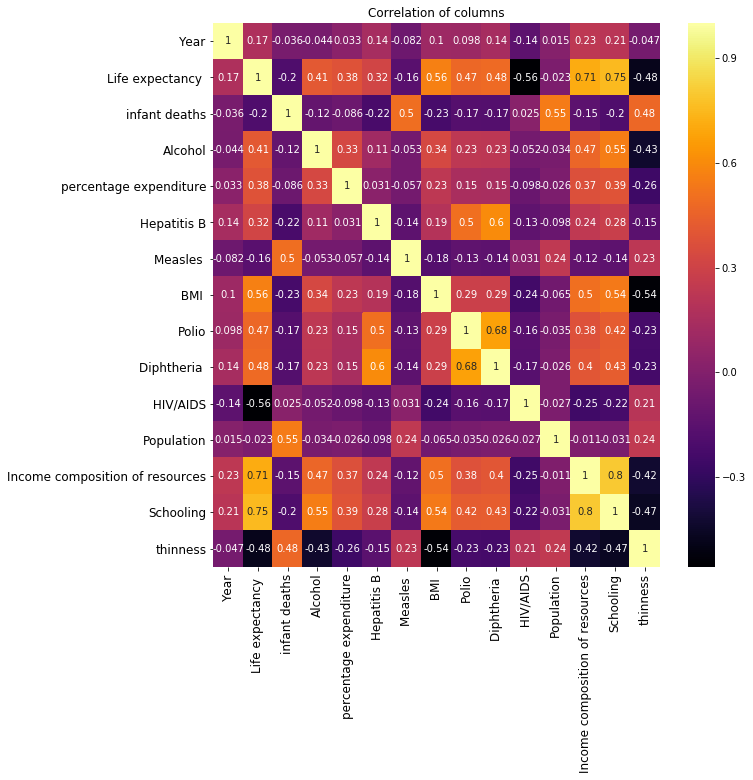

In [22]:
fig=plt.gcf()
sns.heatmap(df.corr(), cmap='inferno',annot=True).set_title("Correlation of columns")

fig.set_size_inches(10,10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [23]:
df = df.drop(columns=['Schooling'])

##### karena schooling memiliki korelasi kuat (0.8) dengan income composition of resources

## Exploratory Data Analysis

### Analisis angka harapan hidup

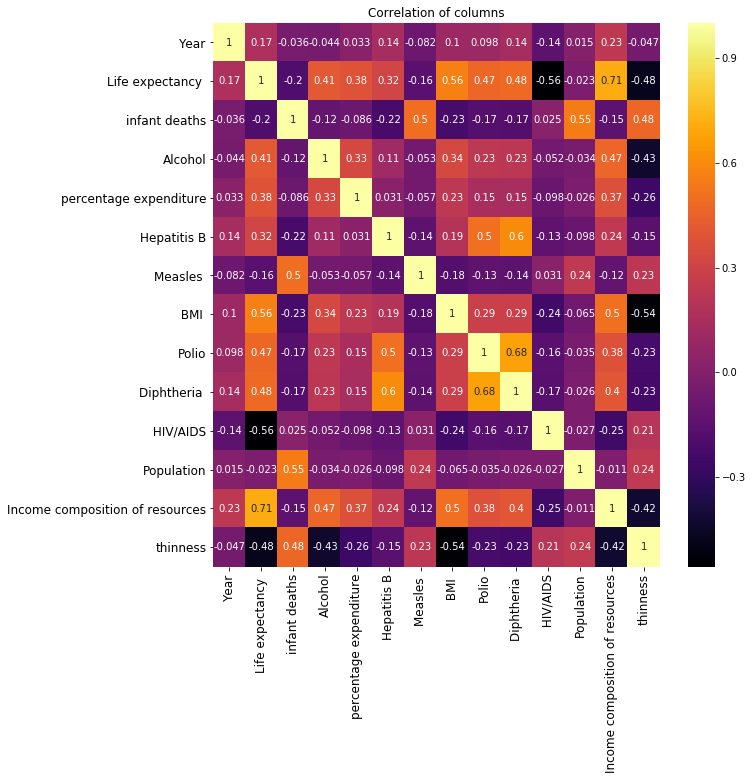

In [24]:
fig=plt.gcf()
sns.heatmap(df.corr(), cmap='inferno',annot=True).set_title("Correlation of columns")

fig.set_size_inches(10,10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##### Angka harapan hidup keseluruhan berkolerasi cukup kuat dengan income composition of resources atau yang merupakan index SDM pada suatu negara, sehingga dapat diketahui bahwa index SDM semakin meningkat maka angka harapan hidup semakin meningkat. Terlihat juga angka harapan hidup terpengaruhi juga oleh banyaknya pengidap HIV/AIDS serta BMI, Namun untuk faktor kesehatan semisal imunisasi polio, imunisasi Hepatitis B, imuniasi tetanus, jumlah kekurangan gizi sedikit mempengaruhi tigkat angka harapan hidup.

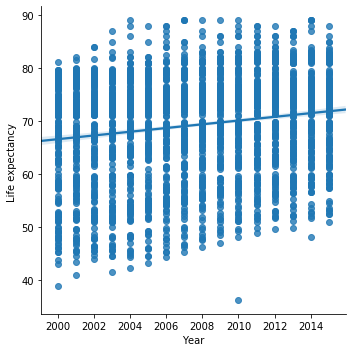

In [63]:
sns.lmplot(x='Year',y='Life expectancy ', data=df)
plt.show()

##### Angka harapan hidup pertahun terlihat semakin meningkat

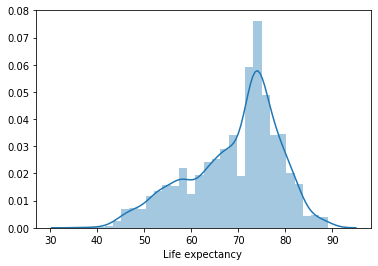

In [25]:
sns.distplot(df['Life expectancy '])
plt.show()

In [26]:
df['Life expectancy '].mean()

69.22493169398912

##### Diketahui bahwa rerata angka harapan hidup dunia sebesar 69.2 Tahun, dengan distribusi palig banyak di rentang 70-80 tahun

### Analisis Status negara dengan kesehatan

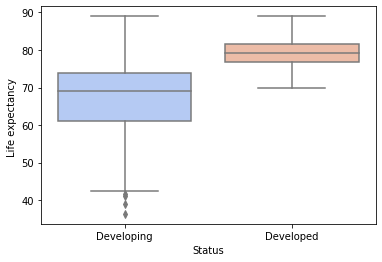

In [52]:
sns.boxplot(x='Status', y='Life expectancy ',data=df, palette='coolwarm')
plt.show()

##### negara maju dan berkembang memiliki perbedaan angka harapan hidup yang cukup signifikan. sehingga dapat diketahui bahwa status negara mempengaruhi angka harapan hidup, terdapat outlier pada negara berkembang diantara nilai 40 sampai 50 an dan hal itu menandakan bahwa negara tersebut memiliki angka harapan hidup yang buruk karena melewati batas bawah

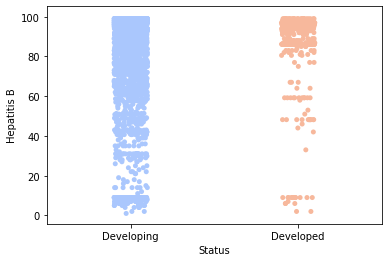

In [54]:
sns.stripplot(x='Status', y='Hepatitis B', data=df, palette='coolwarm')
plt.show()

##### Penanganan untuk hepatitis b antara negara berkembang dan maju hampir sama. terihat bahwa rasio yang mendapatkan imunisasi hepatitis b untuk negar amaju dan berkembang hampir sama sehingga dapat diketahui bahwa tidak begitu mempengaruhi angka harapan hidup

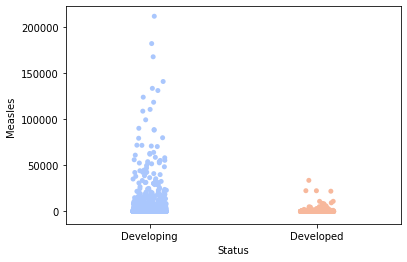

In [55]:
sns.stripplot(x='Status', y='Measles ', data=df, palette='coolwarm')
plt.show()

##### Untuk perkembangan kasus pertahun dari measles sendiri untuk negara maju maupun berkembang hampir sama dibuktikan dengan regresi yang lurus, namun pada negara berkembang masih terdapat kasus measles yang tinggi dibuktikan dengan scatter pada negara berkembang yang tinggi pada tahun 200 namun scatter tertinggi terus menurun pertahun yang terbukti scatter tertinggi na turun tiap tahun. hali ini jjga menandakan bahwa di salah satu negara berkembang kasus measkles nya menurun sangat tajam

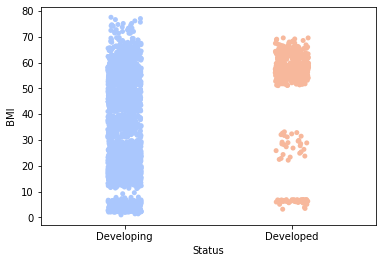

In [56]:
sns.stripplot(x='Status', y=' BMI ', data=df, palette='coolwarm')
plt.show()

##### PAda negara berkembang BMI nya lebih rendah dibanding dengan negara maju yang menunjukkan bahwa negara maju memiliki asupan makanan dan pola hidup sehat yang lebih baik dibanding dengan negara berkembang

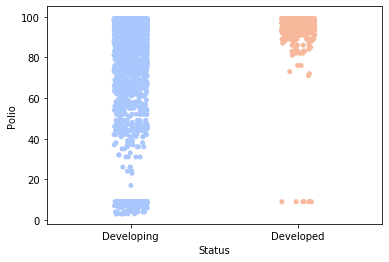

In [58]:
sns.stripplot(x='Status', y='Polio', data=df, palette='coolwarm')
plt.show()

##### Rasio untuk setiap anak satu tahun yang sudah diimunisasi polio pada negara maju jauh lebih baik namun dibandingkan dengan imunisasi polio pada negara berkembang yang sudah tinggi namun masih terdapat titik sekitar 40 yang menandakan pada negara berkembang rasio imunisasi poliountuk beberapa negara berkembang masih buruk dan ouliers yang dibawah batas bawah yangbanyak juga menandakan imunisasi polio menentukan status sebuah negara

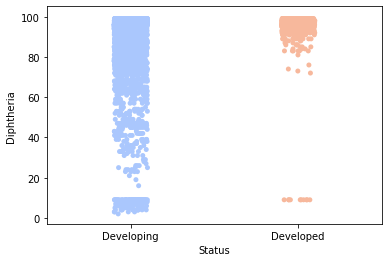

In [59]:
sns.stripplot(x='Status', y='Diphtheria ', data=df, palette='coolwarm')
plt.show()

##### RAsio imunisasi tetanus pada negara berkembang masih kurang jika dibandingkan dengan negara maju

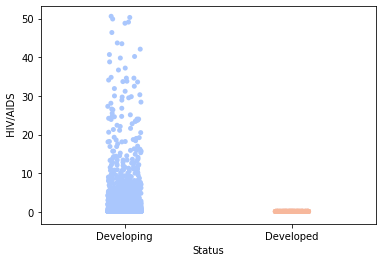

In [60]:
sns.stripplot(x='Status', y=' HIV/AIDS', data=df, palette='coolwarm')
plt.show()

##### KAsus HIV/AIds pada negara berkembang sangat banyak dibandingkan negara maju hal ini menendakan bahwa status negara dipengaruhi oleh HIV/AIDS

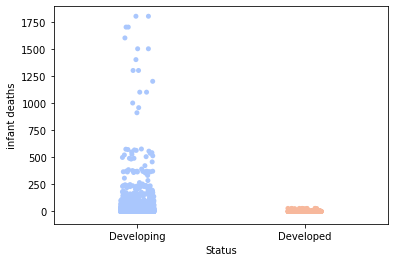

In [61]:
sns.stripplot(x='Status', y='infant deaths', data=df, palette='coolwarm')
plt.show()

##### Menandakan jumlah kematian dewasa pada negara berkembang masih sangat tinggi dibandingkan dengan negara maju yang sudah sangat sedikit yang menandakan status negara menentukan tingkat jumlah kematian dewasa

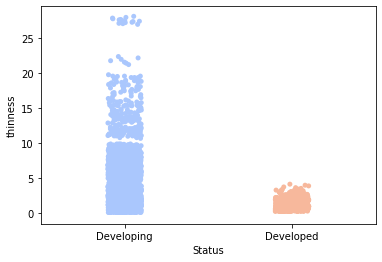

In [62]:
sns.stripplot(x='Status', y='thinness', data=df, palette='coolwarm')
plt.show()

##### PAda negara berkembang masih terdapat banyak sekali kekurangan gizi dibanfingkan dengan negara maju

##### Dari analisis kesehatan dengan status negara dapat diketahui bahwa negara maju memiliki penanganan kesehatan yang sangat baik dibandingkan dengan negara berkembang hal ini terukti lewat analisis beberapa faktor kesehatan. seperti yang terlihat pada imunisasi polio, tetans hepatitis b yang pada negara berkembang masih belum merata. ada yang sudah baik namun masih banyak juga yang belum baik atau rasionya rendah. hal ini membuktikan bahwa kesehatan sangat mempengaruhi tingkat atau status sebuah negara itu maju atau berkembang

## Kesimpulan

- Faktor yang mempengaruhi angka harapan hidup adalah tingkat SDM, namun faktor kesehatan seperti imunisasi, pengidap HIV dll mempengaruhi namun dengan kadar yang sedikit atau korelasi kurang kuat
- Angka harapan hidup dunia berkisar 70 - 80  tahun
- Status negara dapat diketahui melalui tingkat kesehatan suatu negara tersebut.

### Saran

- Untuk setiap negara berkembang harus memperkuat faktor kesehatan karena dapat mempengaruhi maju tidaknya suatu negara